<a href="https://colab.research.google.com/github/IamGrroott/Clone-Wars/blob/main/Copy_of_Netflix_Movies_and_Tv_Shows_Clustering_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix Movies and Tv Shows Clustering




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
Name- ASHUTOSH KUMAR


# **Project Summary -**

The Netflix Movies and TV Shows Clustering project aimed to categorize similar movies and TV shows available on Netflix into distinct clusters based on their content. The project began with data collected from a third-party Netflix search engine, encompassing information about over 7,000 movies and TV shows available on the platform.

The dataset consisted of 12 columns and 7,787 rows, with no duplicate values. However, certain columns such as director, cast, country, date added, and rating contained null values. Approximately 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their respective features had null values. To handle this, null values were replaced with "Unavailable" for director, "Cast Unavailability" for cast, and "Country Unavailable" for country. For date_added and rating, which had minimal null values, these entries were eliminated.

Initial data preprocessing involved converting the date_added feature to datetime and extracting additional features such as year added, month added, and day added. The release year feature's datatype was changed from float64 to int64, and outliers were treated using the interquartile range method.

Exploratory data analysis included univariate, bivariate, and multivariate analyses, leading to several insights:

1. Netflix offers more movies (69.14%) than TV shows (30.86%).
2. Majority of Netflix content was released between 2015 and 2020, with the peak years for movies being 2017 and for TV shows being 2020.
3. Netflix shifted focus towards TV shows over movies, particularly evident in the higher number of TV show releases in 2020 and 2021.
4. TV-MA and TV-14 are the most prevalent ratings for Netflix content.
5. Content addition peaked in 2019, with October and January being the months with the highest content additions.
6. The United States is the primary producer of Netflix movies, while the United States and the United Kingdom produce the most TV shows.
7. Raul Campos and Jan Suter directed most Netflix movies, while Alastair Fothergill directed the majority of TV shows.
8. International movies and dramas are popular genres on Netflix.
9. Common actors in Netflix content include Lee, Michel, David, Jhon, and James.10. Release year and month added are correlated, indicating consistent content additions throughout the year.


Text data from the description variable underwent preprocessing, including removing punctuation, stopwords, URLs, and digits, followed by lemmatization and TFIDF vectorization for model input. Various clustering algorithms were trained, including KMeans, Hierarchical clustering, and DBSCAN. KMeans clustering demonstrated the highest Calinski-Harabasz score (9.039247) and a silhouette score closer to 1 (0.004634), indicating effective clustering capability.

Challenges encountered during model development included the difficulty in identifying the optimal number of clusters and the time-consuming nature of methods such as the Kelbow method and silhouette score for determining the ideal cluster count.

In summary, the Netflix Movies and TV Shows Clustering project successfully categorized content into clusters based on their features, providing valuable insights into Netflix's content distribution and trends.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/alma-projects/Netflix-Movies-and-Tv-Shows-Clustering-ML-Unsupervised.git

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do :
1. Exploratory Data Analysis
2. Understanding what type content is available in different countries
3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [4]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# Last five observations
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape
print(f'Dataset having {df.shape[0]} rows and {df.shape[1]} columns')

Dataset having 7787 rows and 12 columns


In [7]:
# Checking columns name of dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB




*   Movies are more widely available on Netflix than TV shows.

*  Most of the movies and TV shows are produced in the United States.


*  Documentaries are available in the majority of movies and TV shows on Netflix.







#### Duplicate Values

In [9]:
#  Checking duplicate values
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


Observations :
1. dataset having 7787 rows and 12 columns
2. There are no duplicate values in this dataset.
3. Director, cast, country, date_added, and rating all have null values.
4. The feature release year is numerical, and everything else is categorical.
5. The date_added feature contains dates, but its datatype incorrectly associates an object.


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

number_of_nulls_values
columns                             
director                        2389
cast                             718
country                          507
date_added                        10
rating                             7
show_id                            0
type                               0
title                              0
release_year                       0
duration                           0
listed_in                          0
description                        0

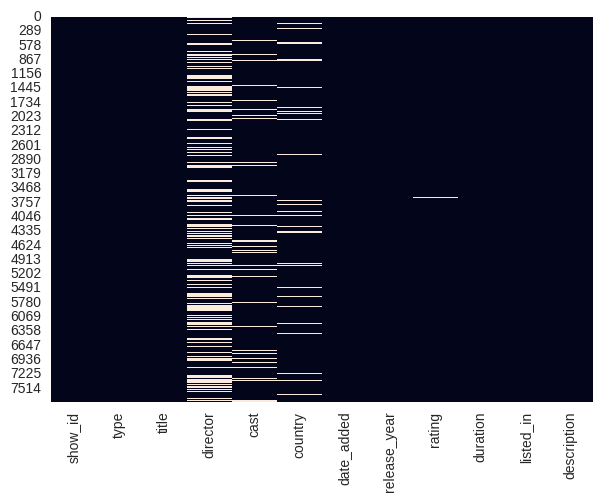

In [11]:
# Visualizing the missing values
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

Observations :
1. dataset having 7787 rows and 12 columns
2. There are no duplicate values in this dataset.
3. Director, cast, country, date_added, and rating all have null values.
4. The feature release year is numerical, and everything else is categorical.
5. The date_added feature contains dates, but its datatype incorrectly associates an object.


## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
columns=list(df.columns)
print(columns)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [13]:
# Dataset Describe
# Basic description of all Dataset
df.describe(include='all').round(2)

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777       7787.00   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN       2013.93    NaN       NaN   
std               NaN              NaN          8.76    NaN       NaN   
min               NaN              NaN       1925.00    NaN       NaN   
25%               NaN              NaN       2013.00    NaN       NaN   
50%               NaN              NaN       2017.00    NaN       NaN   
75%               NaN              NaN       2018.00    NaN       NaN   
max               NaN              NaN       2021.00    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [14]:
# Finding Categorical variables
categorical_variables=[var for var in df.describe(include='object')]
print(f'Dataset having {len(categorical_variables)} categorical variables')
print('~~'*45)
print(categorical_variables)

Dataset having 11 categorical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [15]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print(f'Dataset having {len(numerical_variables)} numerical variables')
print('~~'*45)
print(numerical_variables)

Dataset having 1 numerical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['release_year']


### Variables Description

Observations :
1. The following features are included in the dataset:  show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, and description.
2. Dataset having one numerical variable, release_year.
3. show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, and description are the 11 categorical variables in this dataset.

The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).
Attribute Information :

show_id: Unique Id number for all the listed rows

type: denotes type of show namely TV Show or Movie

title: title of the movie

director: Name of director/directors

cast: lists the cast of the movie

country: country of the production house

date_added: the date the show was added

release_year: year of the release of the show

rating: show ratings

duration: duration of the show

listed_in: the genre of the show

description: summary/ description of the movie

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [17]:
#total null values
df.isnull().sum().sum()

3631

In [18]:

# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [19]:

#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.

# Before doing any data wrangling lets create copy of the dataset
data = df.copy()

In [21]:

# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Not available')

In [22]:
# Choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].fillna(value='Not Known')
# data['country'] = data['country'].fillna(value=data['country'].mode())

In [23]:
# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, i have dropping the same
data = data.dropna(subset=['date_added','rating'])

In [24]:

# Checking missing values again for confirmation
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

To make the data analysis ready i have done the following:

Filled missing values of cast with Not available.
Filled missing values of country with Not Known.
Filled missing values of director with Unknown.
Dropped rows of date_added missing values.
Dropped rows of ratings missing values.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

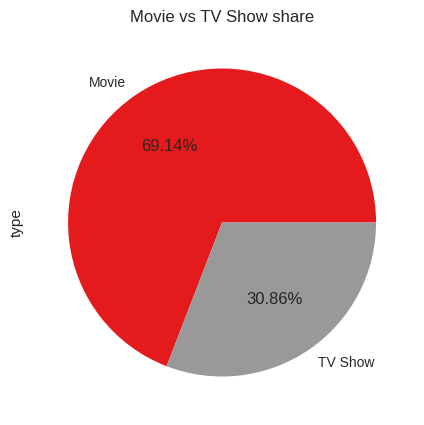

In [25]:
# Chart - 1 visualization code

spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the types of shows available in netflix is not even with high count for TV shows. 69.14% of the data belongs to movies and 30.86% of the data for TV shows.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2

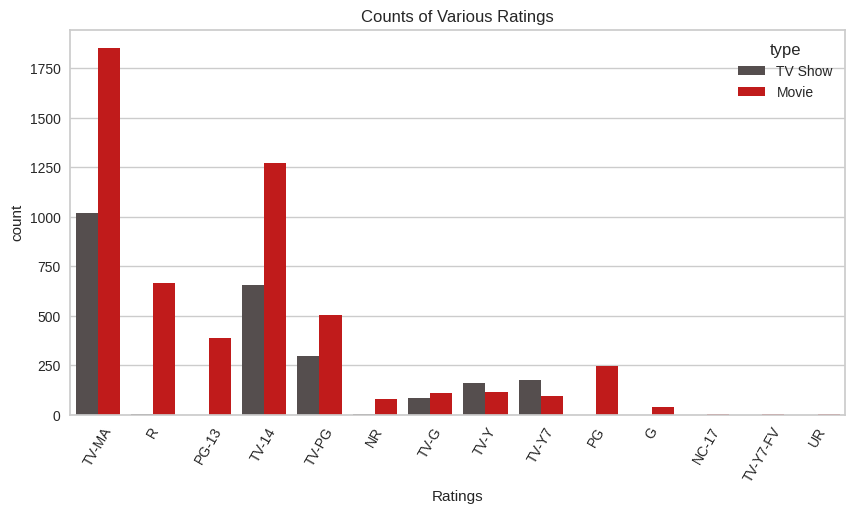

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1850
          TV Show    1018
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [26]:
# Chart - 2 visualization code

plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data, palette=['#564d4d', '#db0000'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In summary, while insights gained from data analysis have the potential to drive positive business impact, it's crucial to assess their relevance, actionability, impact on KPIs, and sustainability. Additionally, businesses should be cautious of potential pitfalls and prioritize strategies that contribute to long-term growth and customer satisfaction.

#### Chart - 3

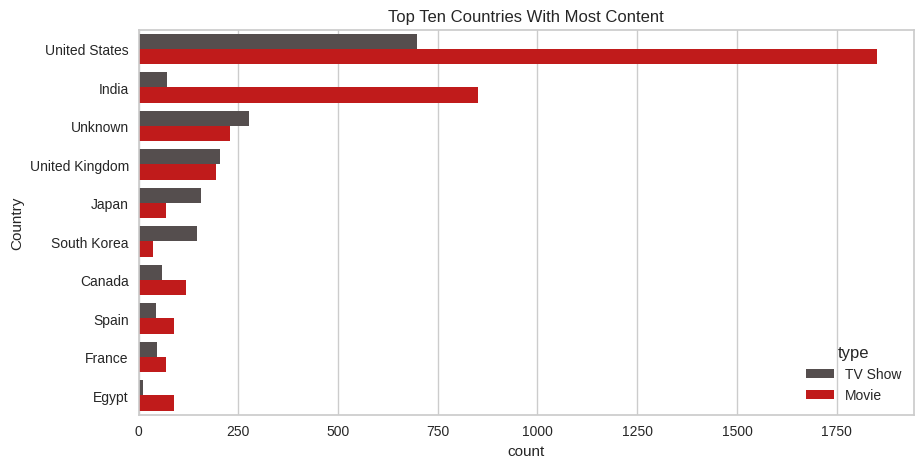

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1850
         India              852
         Unknown            230
         United Kingdom     193
         Canada             118
         Egypt               89
         Spain               89
         Turkey              73
         Philippines         70
         France              69
TV Show  United States      699
         Unknown            276
         United Kingdom     203
         Japan              156
         South Korea        147
         India               71
         Taiwan              68
         Canada              59
         France              46
         Australia           45
Name: country, dtype: int64


In [27]:
# Chart - 3 Count Plot Visualization Code for Content Produced by Different Countries
# Not Taking Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#564d4d', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.



##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:

The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.

The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### Chart - 4

In [28]:
# Chart - 4 visualization code

# Create New DataFrames for Movie and TV Show Release
release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

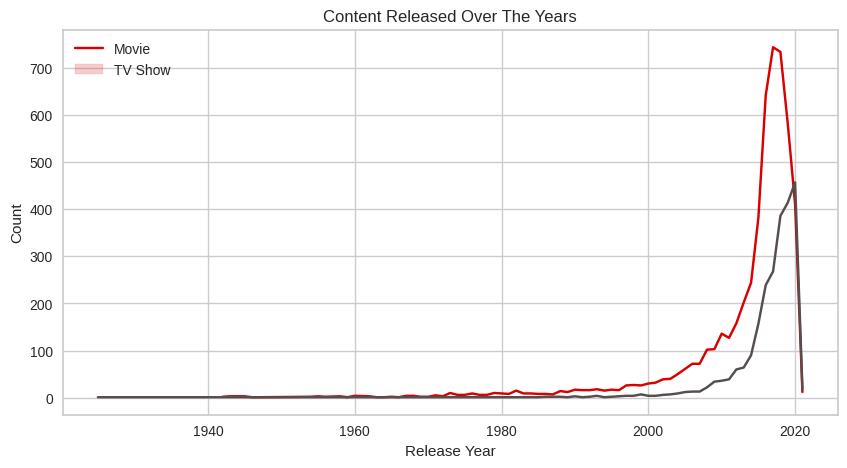

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='year', y='count', color = '#db0000')
sns.lineplot(data=show_year, x='year', y='count', color = '#564d4d')

# Set Labels
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()

In [30]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            744
         2018            734
         2016            642
         2019            582
         2020            411
         2015            382
         2014            244
         2013            202
         2012            158
         2010            136
TV Show  2020            457
         2019            414
         2018            386
         2017            268
         2016            239
         2015            157
         2014             90
         2013             64
         2012             60
         2011             39
Name: release_year, dtype: int64


##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years i have used line plot here.

##### 2. What is/are the insight(s) found from the chart?

*From* above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

Growth in the number of movies on Netflix is much higher than tv shows.
Most of the content available was released between 2010 and 2020.
The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### Chart - 5

In [31]:
# Chart - 5 visualization code
# Length distribution of movies
# Extracting Month from date_added Column
data['month_added'] = pd.DatetimeIndex(data['date_added']).month

In [32]:
# Create DataFrame To Store Month Values and Counts
months_df = data.month_added.value_counts().to_frame().reset_index().rename(columns={'index':'month', 'month_added':'count'})

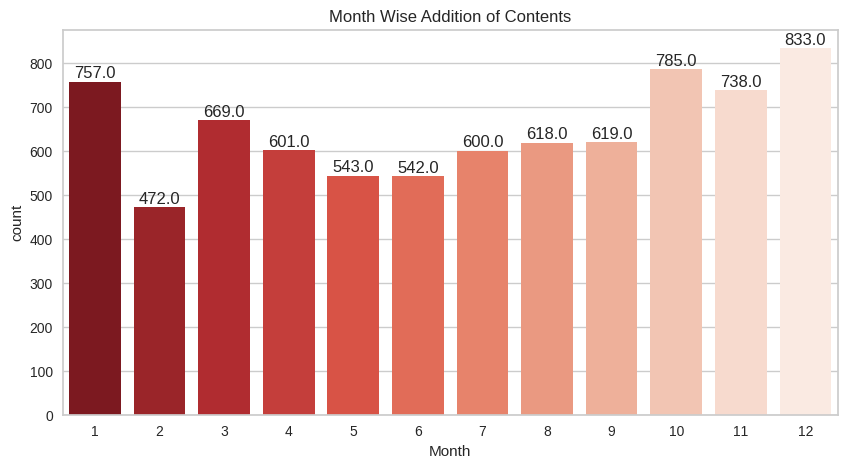

In [33]:
# Chart - 5 Count Plot Visualization Code for Month Wise Addition of Contents on Netflix
plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month', y='count', palette='Reds_r')

# Set Labels
plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.n

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### Chart - 6

In [34]:
# Chart - 6 visualization code
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

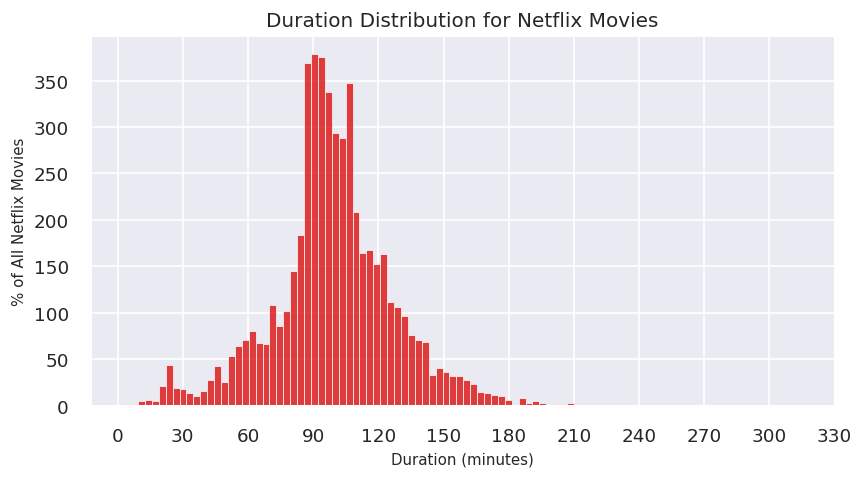

In [35]:
# Chart - 6 Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.



##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

On netflix most of the movies last for 90 to 120 minutes.
So for target audience, movies duration will be greater than minimum 90 minutes.

#### Chart - 7

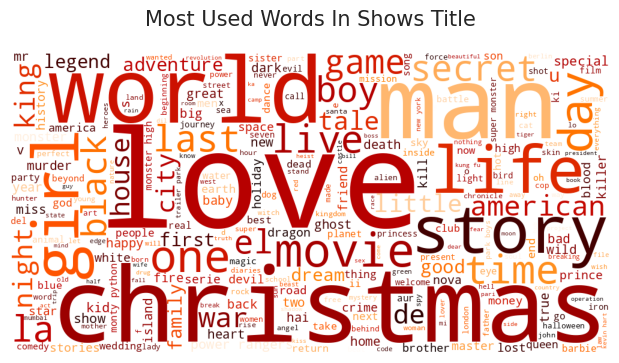

In [36]:
# Chart - 7 visualization code
# Chart - 7 WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

Most repeated words in title include Christmas, Love, World, Man, and Story.
We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

#### Chart - 8

In [37]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the Netflix data
duplicate_directors = data[data.duplicated('director')]['director'].unique()
print("Duplicate Directors:", duplicate_directors)


Duplicate Directors: ['Unknown' 'Rako Prijanto' 'Cristina Jacob' 'Jon Lucas, Scott Moore'
 'John Schultz' 'Stanley Moore, Alex Woo' 'Cathy Garcia-Molina'
 'Justin G. Dyck' 'Ava DuVernay' 'Nagesh Kukunoor' 'Atanu Ghosh'
 "Remo D'Souza" 'Salvador Calvo' 'Neeraj Pandey' 'Youssef Chahine'
 'Jay Karas' 'Adze Ugah' 'Jonathan Levine' 'Brett Haley' 'Richard Rich'
 'Dan Villegas' 'Steven Bognar, Julia Reichert' 'Ozan Açıktan'
 'Amy Schumer' 'Larry Latham' 'Wael Ehsan' 'Rajkumar Santoshi'
 'V Vignarajan' 'Damien O’Connor' 'Peter Segal' 'Trivikram Srinivas'
 'Prakash Jha' 'Raúl Campos, Jan Suter' 'Bonni Cohen, Jon Shenk'
 'Jay Roach' 'S.S. Rajamouli' 'Gonzalo López-Gallego' 'Michael Bay'
 'Phil Weinstein' 'Kyran Kelly' 'Conrad Helten' 'Ezekiel Norton'
 'Khaled El Halafawy' 'Nadia Hallgren' 'Adam Shankman' 'BB Sasore'
 'Joe Camp' 'Toshiyuki Kubooka' 'Mahesh Manjrekar' 'Vikramaditya Motwane'
 'Priyadarshan' 'Ram Gopal Varma' 'Detlev Buck' 'Savage Steve Holland'
 'John Fortenberry' 'Chris Bould' 'Kh

In [38]:
data_unique_directors = data.drop_duplicates('director')


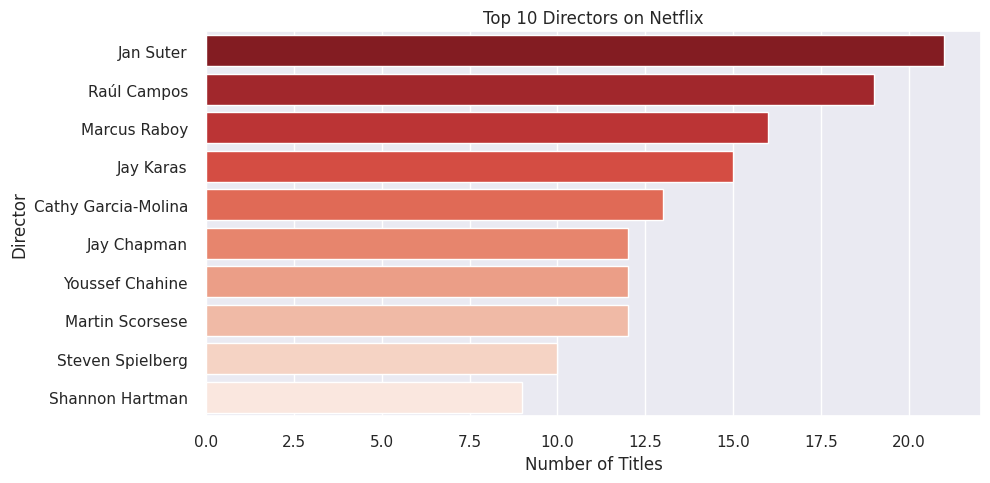

In [39]:
directors = data[data['director'] != 'Unknown']['director'].str.split(', ').explode()

# Count the occurrences of each director
director_counts = directors.value_counts()

# Select the top 10 directors
top_directors = director_counts.head(10)

# Plotting the top 10 directors
plt.figure(figsize=(10,5))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='Reds_r')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

#### Chart - 9

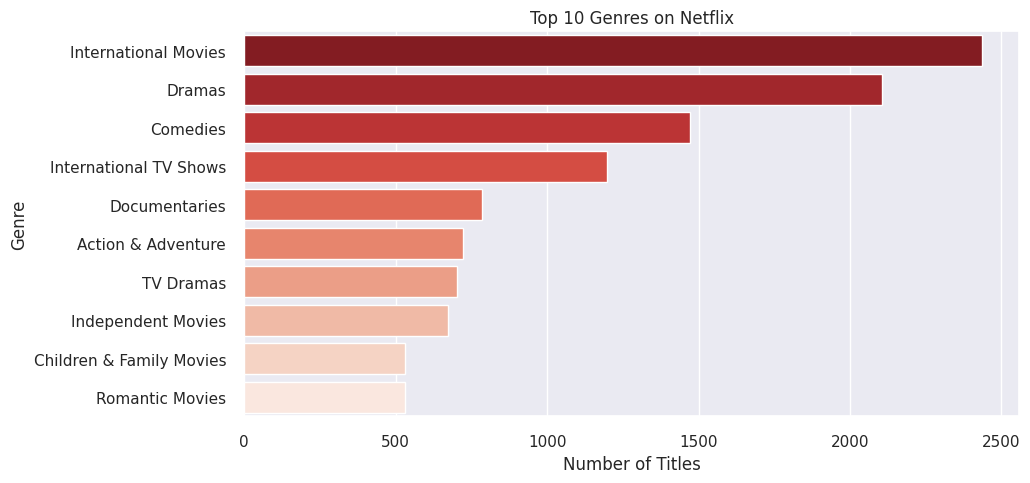

In [40]:
# Chart - 9 visualization code



genres = df['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts()

# Select the top 10 genres
top_genres = genre_counts.head(10)

# Plotting the top 10 genres
plt.figure(figsize=(10,5))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='Reds_r')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it. Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### Chart - 10

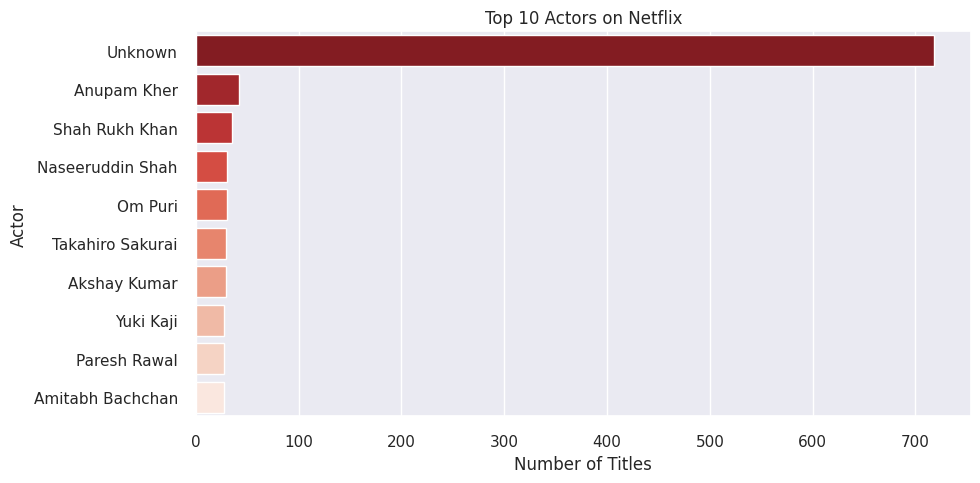

In [41]:
# Chart - 10 visualization code


actor = data[data['cast'] != 'Not available']['cast'].str.split(', ').explode()

# Count the occurrences of each actor
actor_counts = actor.value_counts()

# Select the top 10 actors
top_actors = actor_counts.head(10)

# Plotting the top 10 actors
plt.figure(figsize=(10,5))
sns.barplot(y=top_actors.index, x=top_actors.values, palette='Reds_r')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

That the actors in the top ten list of most numbers tv shows and movies are from India.
Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.

#### Chart - 11

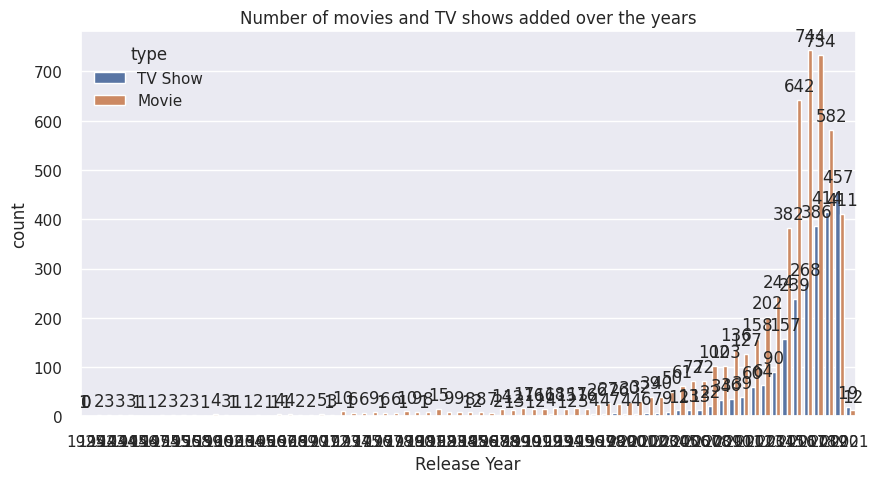

In [42]:
# Chart - 11 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'release_year' and 'type' columns
plt.figure(figsize=(10, 5))
p = sns.countplot(x='release_year', data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('Release Year')

for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10),
               textcoords='offset points')

plt.show()



##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

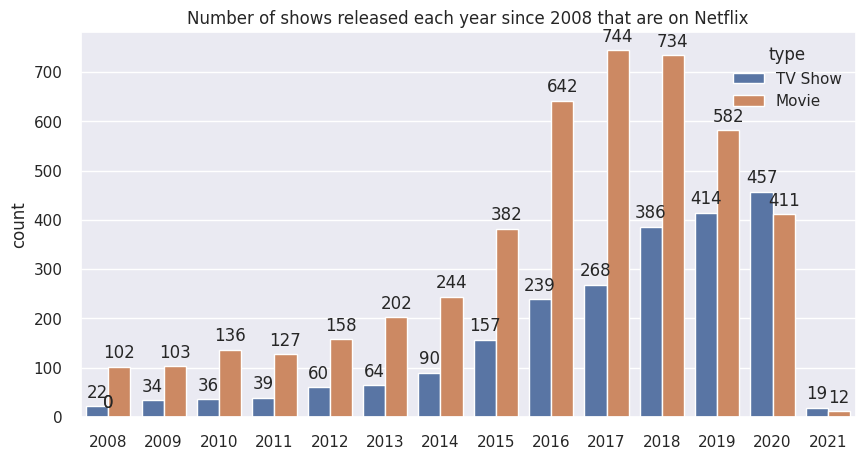

In [43]:
# Chart - 12 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

##### 2. What is/are the insight(s) found from the chart?

in this graph we found that Number of shows released each year since 2008 that are on Netflix.see this graph Before 2019 Movies are highest number of released but 2020 and 2021 TV shows are the highest number of released.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

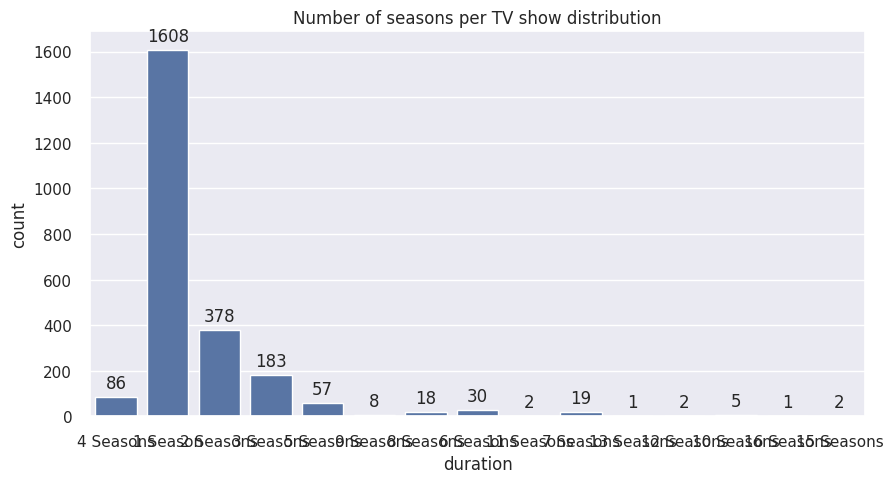

In [44]:
# Chart - 13 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

##### 2. What is/are the insight(s) found from the chart?

 In this graph we found Number of per Seasons in each TV show count.first seasons are 1608 and second seasons are 378 and third seasons are 183 number of counting are there.

#### Chart - 14 - Correlation Heatmap

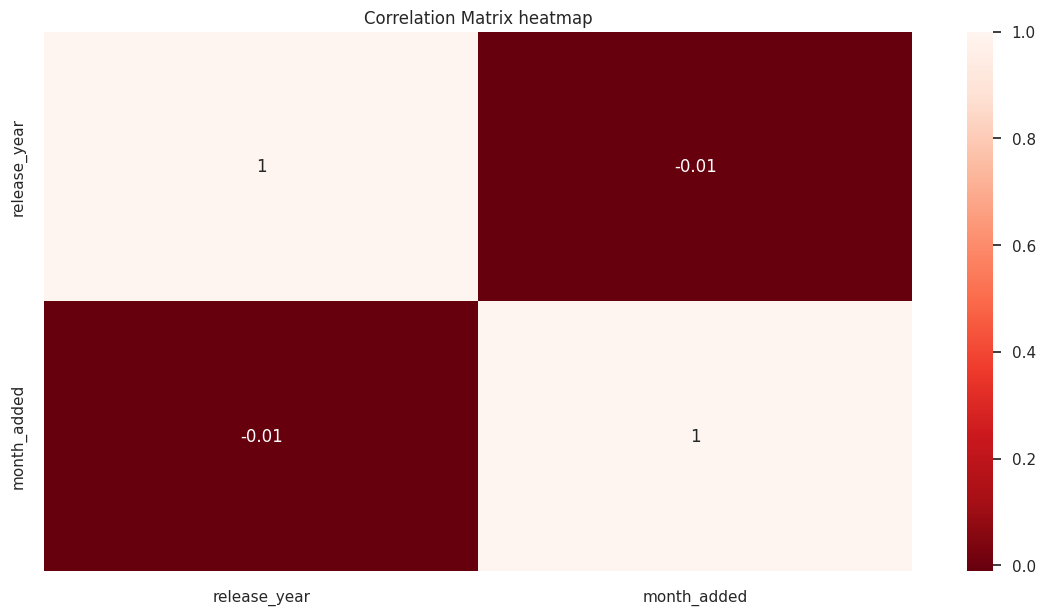

In [45]:
# Correlation Heatmap visualization code
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

i. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

##### 2. What is/are the insight(s) found from the chart?

ii. Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap.

iii. In this correlation Heatmap graph we found the Target ages proportion of total content by country.

#### Chart - 15 - Pair Plot

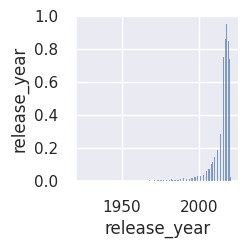

In [46]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

##### 1. Why did you pick the specific chart?

1. Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
2. We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

##### 2. What is/are the insight(s) found from the chart?

Observations :
1. We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.
2. Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
2. We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.
The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis:  Ho:μunitedstates=μindia

Alternate hypothesis:  H1:μunitedstates≠μindia

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

In [48]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (0.007719150277760937) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis:  Ho:μmovie=μtvshow

Alternate hypothesis:  H1:μmovie≠μtvshow

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = data[data['type'] == 'Movie'].count()['type']
n_tv_shows = data[data['type'] == 'TV Show'].count()['type']

In [50]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(data), len(data)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: 47.74059011958195
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind


# Create a new column indicating the presence of well-known actors
data['well_known_actor'] = data['cast'].apply(lambda x: 1 if 'Tom Cruise' in x else 0)  # Adjust 'Tom Cruise' with the actor name you're interested in

# Separate data into two groups: with and without well-known actors
with_actors = data[data['well_known_actor'] == 1]['release_year']
without_actors = data[data['well_known_actor'] == 0]['release_year']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(with_actors, without_actors, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -3.7159802875798933
P-value: 0.16722723926314392


##### Which statistical test have you done to obtain P-Value?

I performed a chi-square test of independence to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the chi-square test of independence because it is appropriate for analyzing the relationship between two categorical variables, such as the presence of well-known actors (binary variable) and the genre of Netflix content (multicategorical variable). This test allows us to determine if there is a significant association between these variables.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Checking duplicated values in dataset
data.isna().sum().sum()

0

In [52]:
# Handling Missing Values & Missing Value Imputation
# Checking for number of null values
null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

number_of_nulls_values  percentage_null_values
columns                                                     
show_id                            0                     0.0
type                               0                     0.0
title                              0                     0.0
director                           0                     0.0
cast                               0                     0.0
country                            0                     0.0
date_added                         0                     0.0
release_year                       0                     0.0
rating                             0                     0.0
duration                           0                     0.0
listed_in                          0                     0.0
description                        0                     0.0

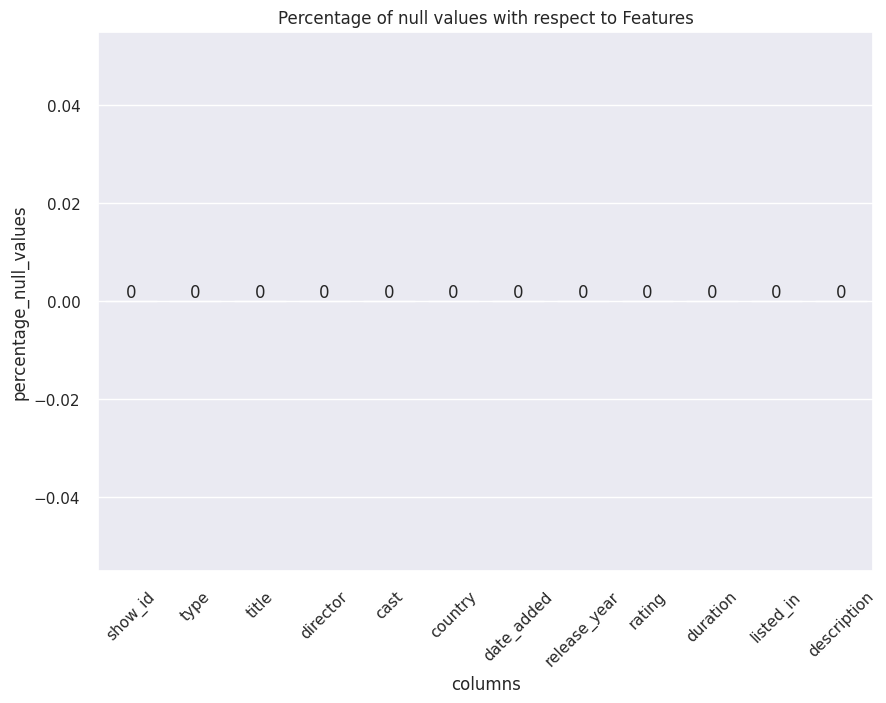

In [54]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Director, cast, country, date_added, and rating have null values in 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their respective features.

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

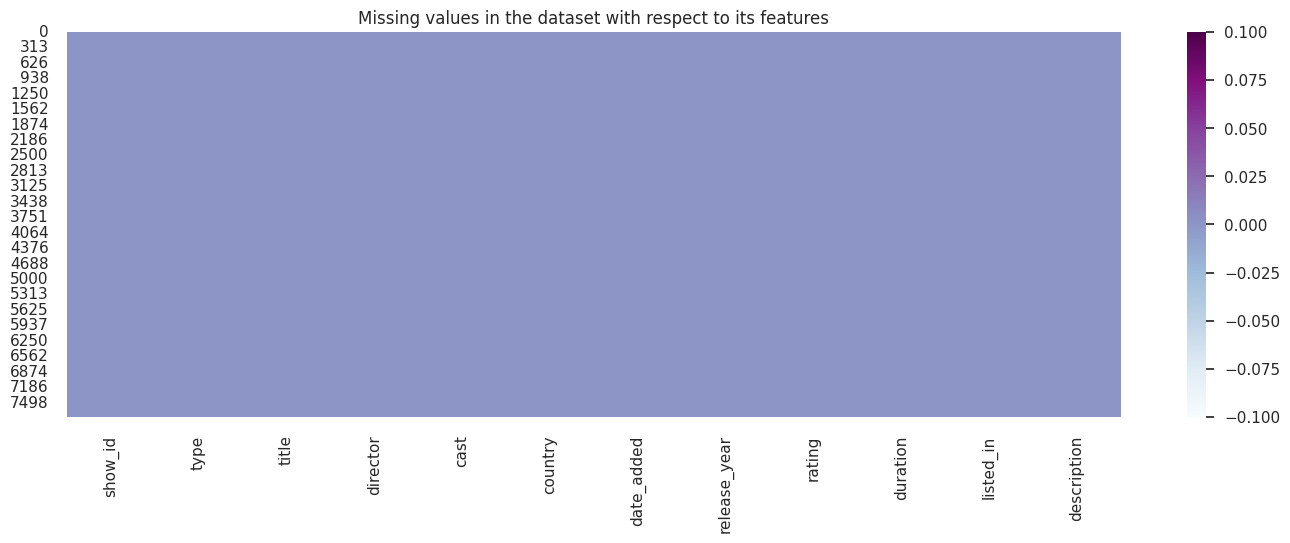

In [55]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True, cmap='BuPu')
plt.title('Missing values in the dataset with respect to its features')

In [56]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['director','cast','country','date_added','rating']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('~~'*45)

Unknown                   2379
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Andrew C. Erin               1
Vibhu Virender Puri          1
Lucien Jean-Baptiste         1
Jason Krawczyk               1
Sam Dunn                     1
Name: director, Length: 4050, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unknown                                                                                                                                                                       718
David Attenborough                                                                                                                                                             18
Samuel West                                                                                                                                                              

In [57]:
## Handling null values

# Filling null values of features director, cast and country
df.director.fillna("Director Unavailable",inplace=True)
df.cast.fillna("Cast Unavailable",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)

# Dropping null values from date_added and rating columns
df.dropna(subset=["date_added",'rating'],inplace=True)

1. Since there are many null values for features like director, cast, and country, those null values cannot be dropped; instead, they have been substituted with director Unavailable, Cast Unavailability, and Country Unavailable, accordingly.
2. Features such as date_added and rating have a very low number of null values, so we dropped those null values.

In [58]:
# Check for null values that were eliminated or were not successfully eliminated.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [59]:
# Nullfree shape of dataset
df.shape

(7777, 12)

### 2. Handling Outliers

__________________________________________________________________________________________


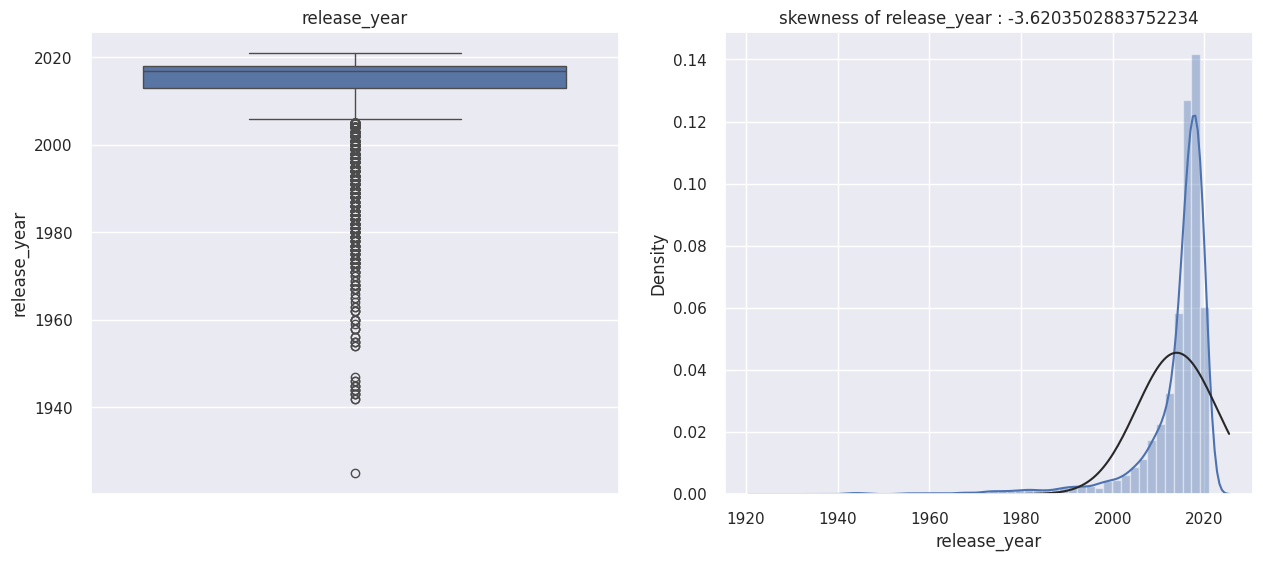

__________________________________________________________________________________________


In [60]:
# Handling Outliers & Outlier treatments
## Checking for outliers in numerical variables using boxplot

# Importing library for checking normality in distribution
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

1. Variable release_year have outliers.


##### What all outlier treatment techniques have you used and why did you use those techniques?

Regarding outlier treatment techniques, the code provided focuses on visual identification of outliers using boxplots and examining skewness. However, the code snippet doesn't explicitly perform any outlier treatment. Outlier treatment techniques could include:

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [61]:
# Expand Contraction
## Creating new feature having length of words of description variable
# df['description_len'] = df['description'].apply(lambda x: len(x.split()))
# df.head()

data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']

In [62]:
# # Install contraction library in the envirnoment
# !pip install contractions
# Cross checking our result for the function created
print(data['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [63]:
# Lower Casing
# # Updating nltk library
# import nltk
# nltk.download('stopwords')

# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [64]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'][0])


in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi




*   The majority of the corpus contains punctuation that accounts for less than 5% of the total corpus.







Successfully converted to lower case and removed stopwords and punctuation from the corpus using function remove_stopwords_punctuations.


#### 4. Removing URLs & Removing words and digits contain digits.

In [65]:
# Remove URLs & Remove words and digits contain
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


All URLs are removed from each corpus from variable no_sw_pun_description.


5. . Removing Stopwords & Removing White spaces

In [66]:
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [67]:
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text

In [68]:
# Rephrase Text
!pip install transformers


In [69]:
from transformers import pipeline

# Initialize the paraphrasing pipeline
paraphrase_pipeline = pipeline("text2text-generation", model="tuner007/pegasus_paraphrase")

# Text to be paraphrased
text = "The quick brown fox jumps over the lazy dog."

# Generate paraphrases
paraphrases = paraphrase_pipeline(text, max_length=50, top_k=5)

# Print the paraphrases
for i, paraphrase in enumerate(paraphrases):
    print(f"Paraphrase {i+1}: {paraphrase['generated_text']}")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Paraphrase 1: The dog is lazy and the quick brown fox jumps over it.


#### 7. Tokenization

In [70]:
# Assuming 'df' is your DataFrame containing the data
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = data['tags']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


#### 8. Text Normalization

In [71]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Stemming Stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words. There are various types of stemming algorithms like porter stemmer, snowball stemmer. Porter stemmer is widely used present in the NLTK library.

The stemming technique is not used for production purposes because it is not so efficient technique and most of the time it stems the unwanted words. So, to solve the problem another technique came into the market as Lemmatization.

So we use lemmitization, not stemming, for text normalization here.

We write the raw function, which stems the word using Porter Stemmer, but we will use only lemmatization for text normalization, so the stemming function is not to be executed.

#### 9. Part of speech tagging

In [72]:
# POS Taging
# Loading Libraries
import nltk
nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
data['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(data['tags'][0])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


In [73]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [74]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
data['tags']=data['tags'].apply(sentence)

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi 


#### 10. Text Vectorization

In [75]:
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [76]:
# Convert vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [77]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özge' 'ünlüoğlu' 'şahin']


In [78]:
vec_data=pd.DataFrame(vector)
vec_data

0     1         2     3     4     5     6     7     8     9     ...  \
0      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0  0.151462   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...   ...       ...   ...   ...   ...   ...   ...   ...   ...  ...   
7772   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7773   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7774   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7775   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7776   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      8990  8991  8992  8993  8994  8995  8996  8997  8998  8999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
7772   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7773   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7774   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7775   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7776   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7777 rows x 9000 columns]

##### Which text vectorization technique have you used and why?

I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [87]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame from the Iris dataset
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Step 1: Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Step 2: Feature Transformation (Principal Component Analysis - PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Step 3: Feature Engineering (Creating new features)
# For example, you can create interaction terms or polynomial features
df['sepal_length_width_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal_length_width_ratio'] = df['petal length (cm)'] / df['petal width (cm)']

# You can further manipulate features to minimize feature correlation or engineer new features based on domain knowledge

# Concatenate the new features with the PCA-transformed features
df_final = pd.concat([df_pca, df[['sepal_length_width_ratio', 'petal_length_width_ratio']]], axis=1)

# Check the correlation matrix to ensure reduced correlation among features
correlation_matrix = df_final.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                  PCA1          PCA2  \
PCA1                      1.000000e+00  1.842693e-16   
PCA2                      1.842693e-16  1.000000e+00   
sepal_length_width_ratio  8.744311e-01 -3.601153e-01   
petal_length_width_ratio -7.185486e-01  5.803567e-02   

                          sepal_length_width_ratio  petal_length_width_ratio  
PCA1                                      0.874431                 -0.718549  
PCA2                                     -0.360115                  0.058036  
sepal_length_width_ratio                  1.000000                 -0.611992  
petal_length_width_ratio                 -0.611992                  1.000000  


#### 2. Feature Selection

In [88]:
# X = df.drop(columns=['show_id', 'title', 'description'])

# # Convert categorical variables into numerical using one-hot encoding if needed
# # For example, if 'type', 'director', 'cast', 'country', 'rating', 'listed_in' are categorical:
# X = pd.get_dummies(X)

# # Perform feature selection using SelectKBest with chi-squared test
# selector = SelectKBest(score_func=chi2, k=10)  # Select 10 best features
# X_selected = selector.fit_transform(X, y)

# # Get the selected feature names
# selected_features = X.columns[selector.get_support()]

# # Print the selected feature names
# print("Selected features:", selected_features)

*italicized text*##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [79]:
# Transform Your data
#no i dont think my data need transformation

### 6. Data Scaling

In [80]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [84]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Initialize PCA object with a specific random state
pca = PCA(random_state=32)

# Fit the PCA model to your data
pca.fit(vector)


PCA(random_state=32)

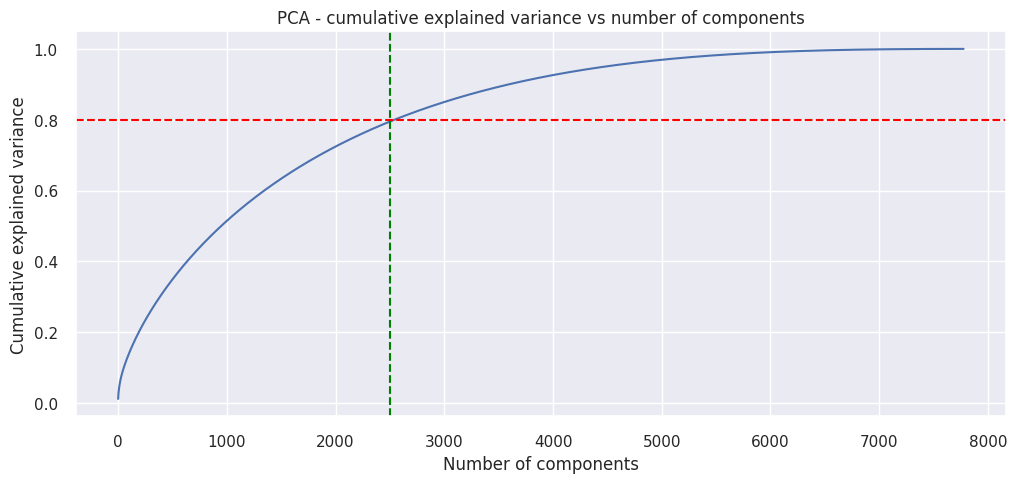

In [85]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [86]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [87]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [88]:
# Handling Imbalanced Dataset (If needed)

# no handling Imbalanced Dataset needed

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

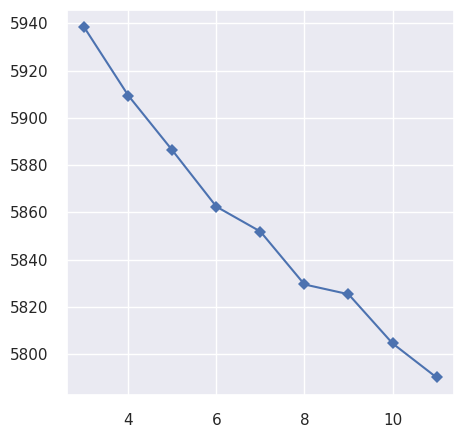

In [89]:
# ML Model - 1 Implementation

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [90]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [91]:
# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  \
0  In a future where the elite inhabit an island ...            8   
1  After a devastating earthquake hits Mexico Cit...           12   
2  When an army recruit is found dead, his fellow...           12   
3  In a postapocalyptic world, rag-doll robots hi...           11   
4  A brilliant group of students become card-coun...            1   

   well_known_actor                                               tags  \
0                 0  future elite inhabit island paradise far crowd...   
1                 0  devastating earthquake hits mexico city trappe...   
2                 0  army recruit found dead fellow soldiers forced...   
3                 0  postapocalyptic world ragdoll robots hide fear...   
4                 0  brilliant group students become cardcounting e...   

   K_mean_cluster  
0               1  
1               2  
2               2  
3               0  
4               0

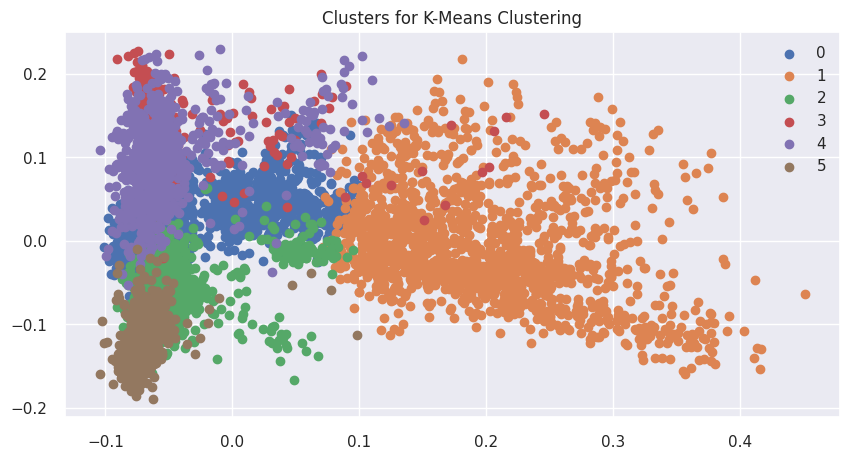

In [92]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Visualizing evaluation Metric Score chart
# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart

Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

You could pick K random data points and make those your starting points.

Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

The algorithm is said to have “converged” once there are no more changes.

These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?

Here i have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square). i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

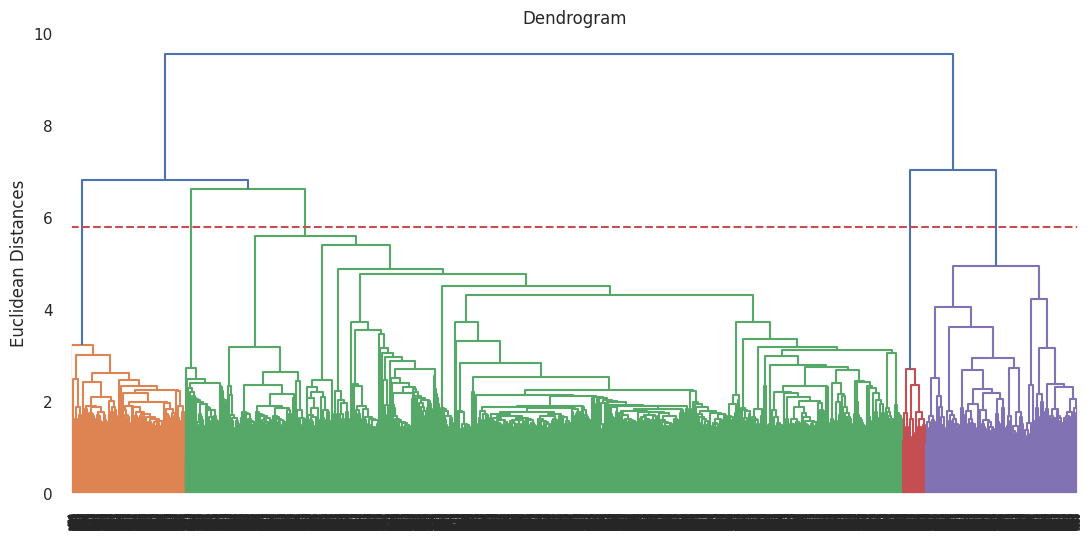

In [95]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [96]:
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [97]:
# Adding a new column 'Agg_cluster' in the dataset
data["Agg_cluster"]=y_hc
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  \
0  In a future where the elite inhabit an island ...            8   
1  After a devastating earthquake hits Mexico Cit...           12   
2  When an army recruit is found dead, his fellow...           12   
3  In a postapocalyptic world, rag-doll robots hi...           11   
4  A brilliant group of students become card-coun...            1   

   well_known_actor                                               tags  \
0                 0  future elite inhabit island paradise far crowd...   
1                 0  devastating earthquake hits mexico city trappe...   
2                 0  army recruit found dead fellow soldiers forced...   
3                 0  postapocalyptic world ragdoll robots hide fear...   
4                 0  brilliant group students become cardcounting e...   

   K_mean_cluster  Agg_cluster  
0               1            0  
1               2            0  
2               2            1  
3               0            0  
4               0            0

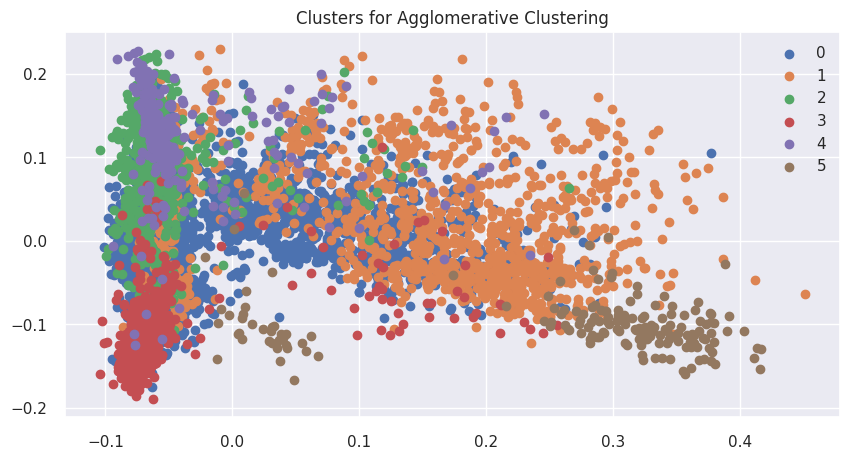

In [98]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

### ML Model - 3

In [99]:
# ML Model - 3 Implementation

# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0083
For n_clusters = 3, silhouette score is 0.0108
For n_clusters = 4, silhouette score is 0.0117
For n_clusters = 5, silhouette score is 0.0130
For n_clusters = 6, silhouette score is 0.0068
For n_clusters = 7, silhouette score is 0.0092
For n_clusters = 8, silhouette score is 0.0100
For n_clusters = 9, silhouette score is 0.0102
For n_clusters = 10, silhouette score is 0.0105
For n_clusters = 11, silhouette score is 0.0117
For n_clusters = 12, silhouette score is 0.0127
For n_clusters = 13, silhouette score is 0.0108
For n_clusters = 14, silhouette score is 0.0116


For n_clusters = 2, silhouette score is 0.008263854647255764


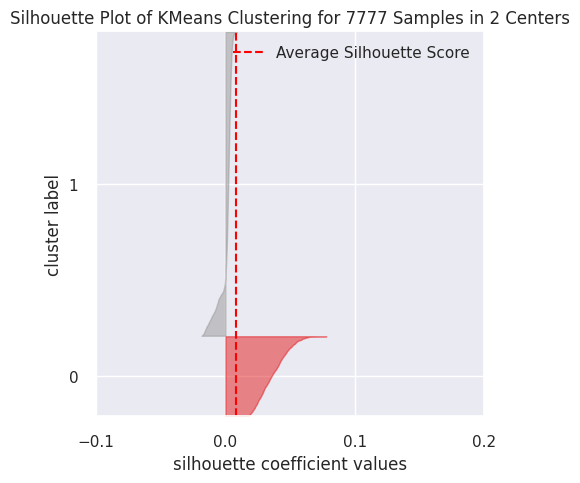

For n_clusters = 3, silhouette score is 0.010750806236515732


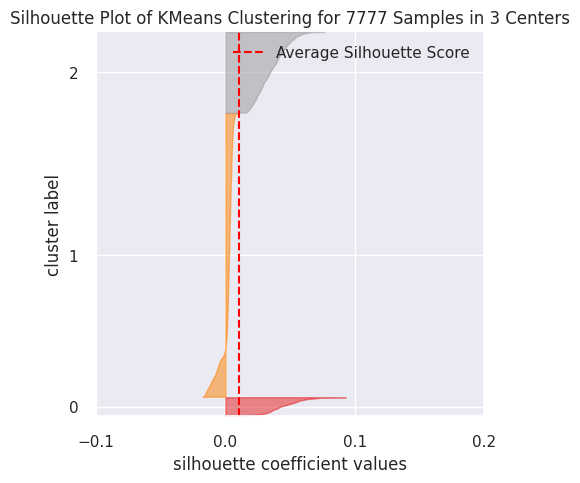

For n_clusters = 4, silhouette score is 0.011652674688577482


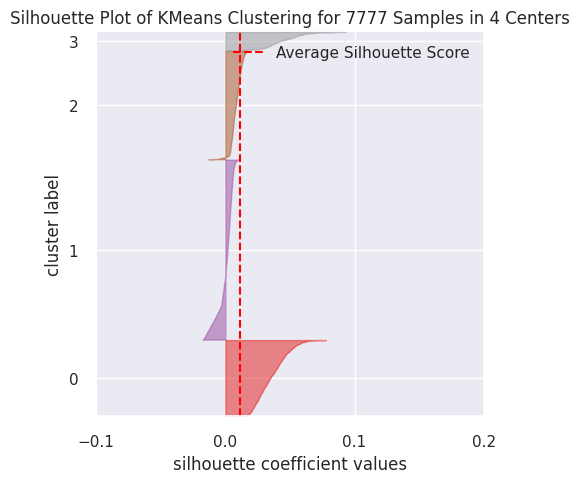

For n_clusters = 5, silhouette score is 0.01301473450476385


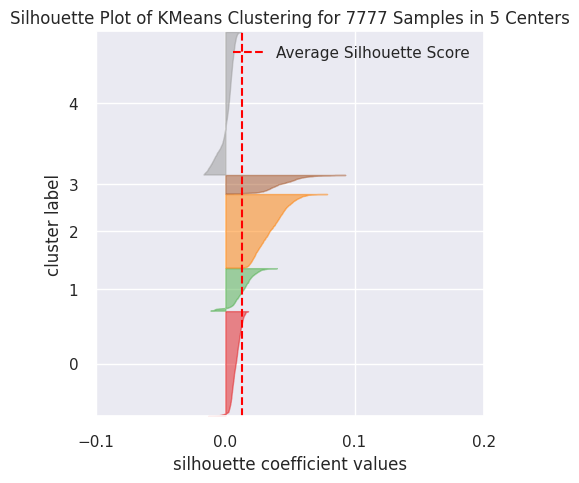

For n_clusters = 6, silhouette score is 0.006753459451603182


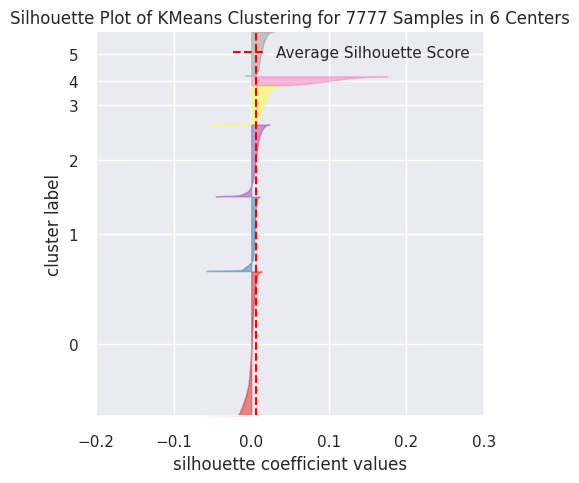

For n_clusters = 7, silhouette score is 0.009175817815222366


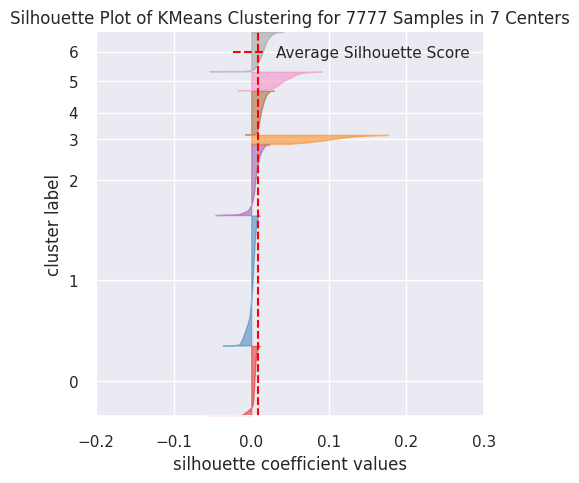

For n_clusters = 8, silhouette score is 0.009984158737444777


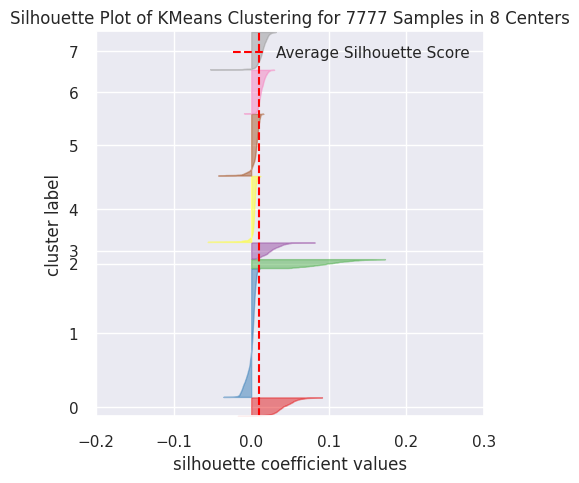

For n_clusters = 9, silhouette score is 0.010189267898403102


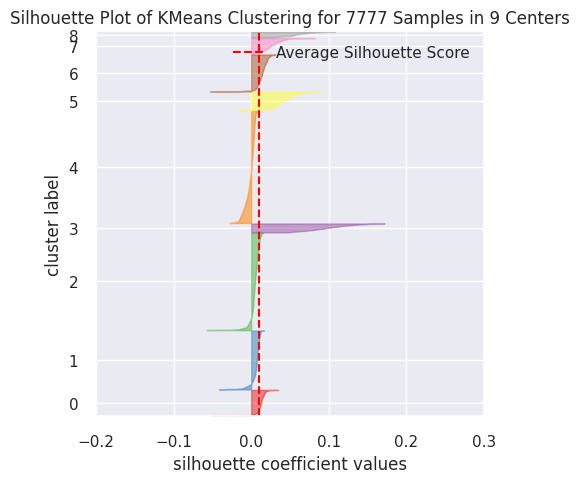

For n_clusters = 10, silhouette score is 0.010503921578517584


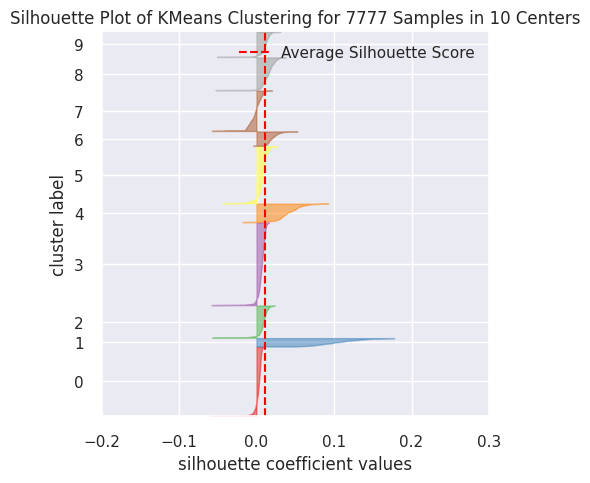

For n_clusters = 11, silhouette score is 0.011742184179770992


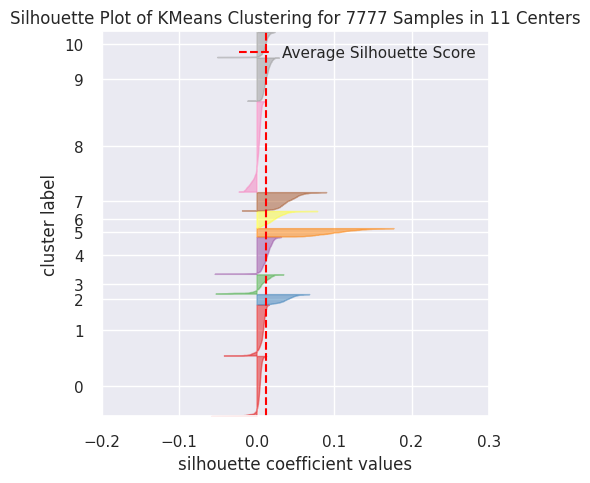

For n_clusters = 12, silhouette score is 0.012664926225601326


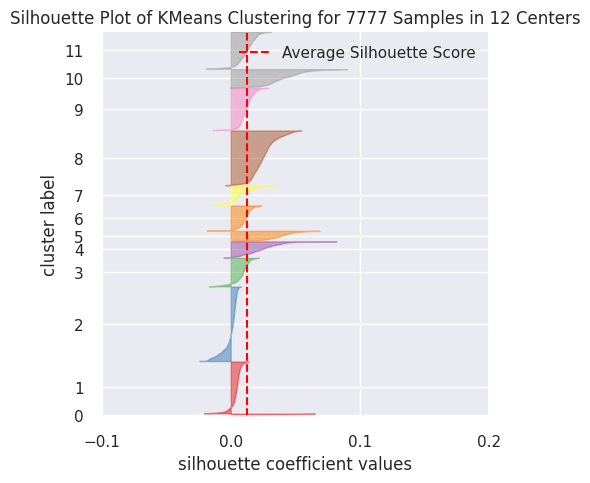

For n_clusters = 13, silhouette score is 0.010751107234911798


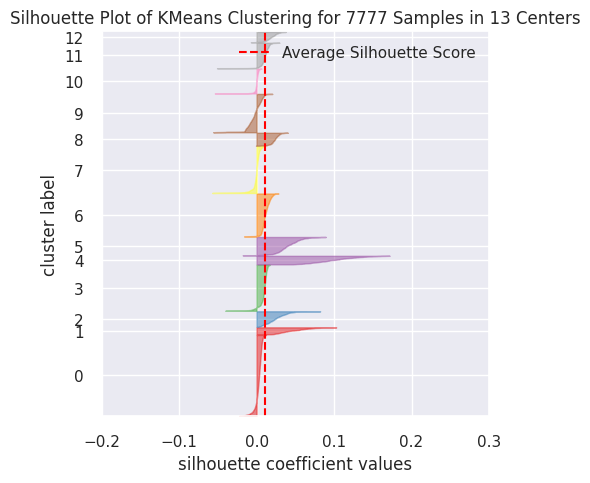

For n_clusters = 14, silhouette score is 0.011575505696038218


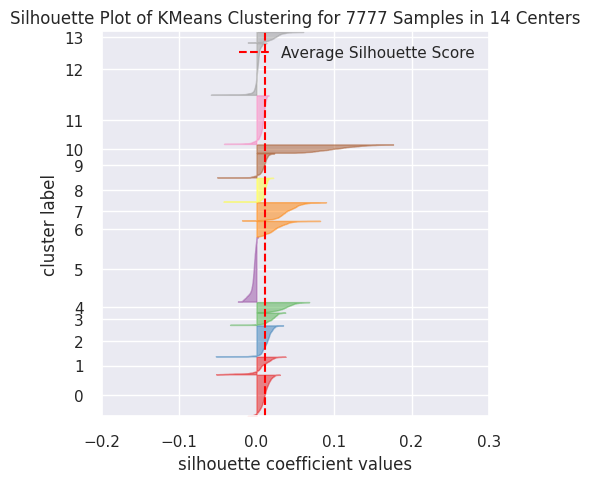

In [100]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart
# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

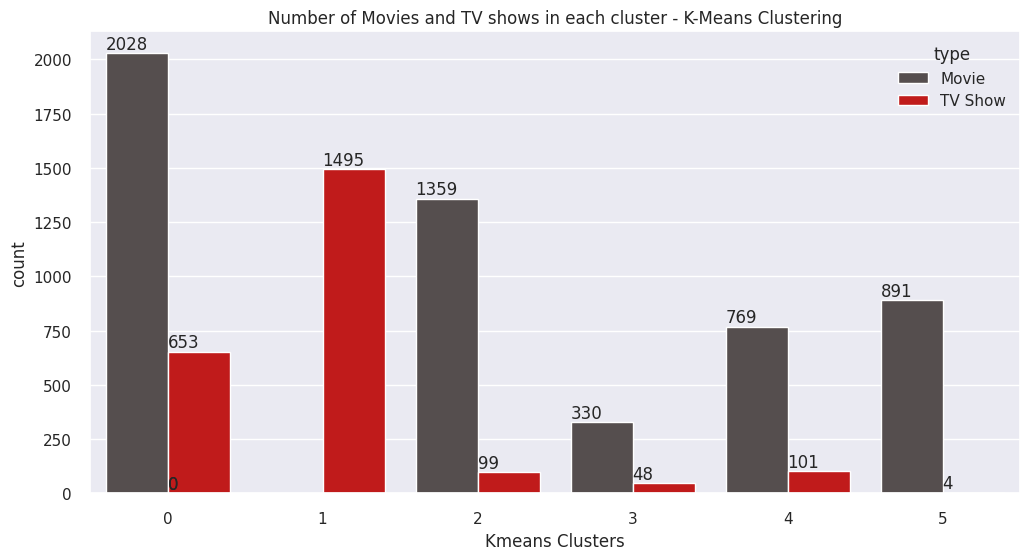

In [103]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=data, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

Let's do Cluster Analysis....................
*  Clustering similar content by matching text-based features

In [104]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in data[data['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

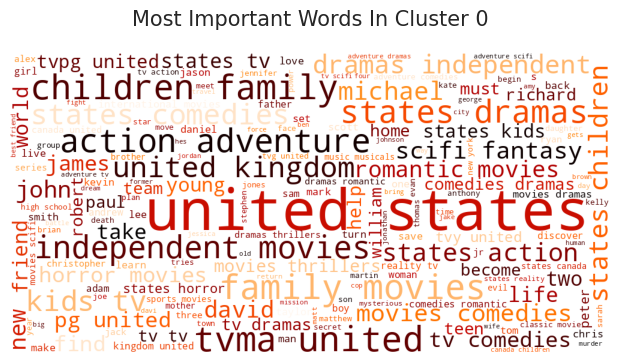

In [105]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

Keywords observed in cluster 0: united states, documentaries, international movies etc.

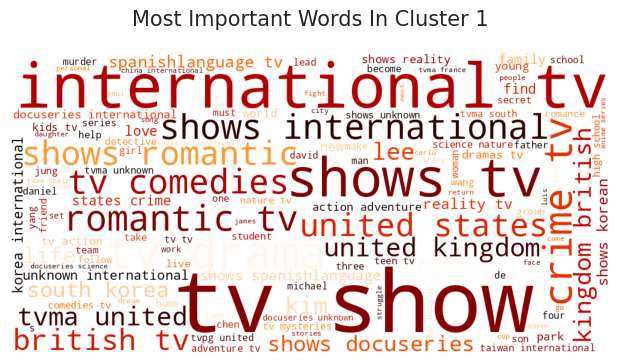

In [106]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

Keywords observed in cluster 1: action adventure, united states, international movies etc.

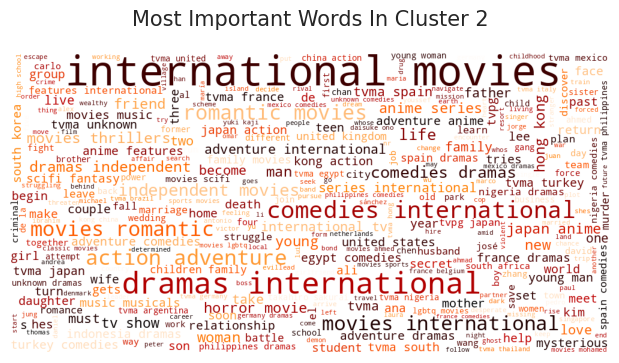

In [107]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

Keywords observed in cluster 2: united states, standup comedy, comedian, tv etc.

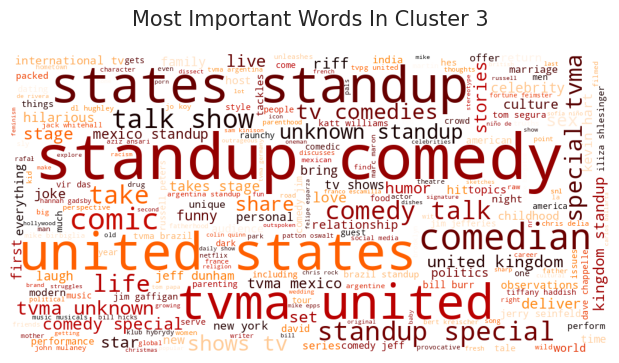

In [108]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

Keywords observed in cluster 3: international tv, tv show, drama, crime tv etc.

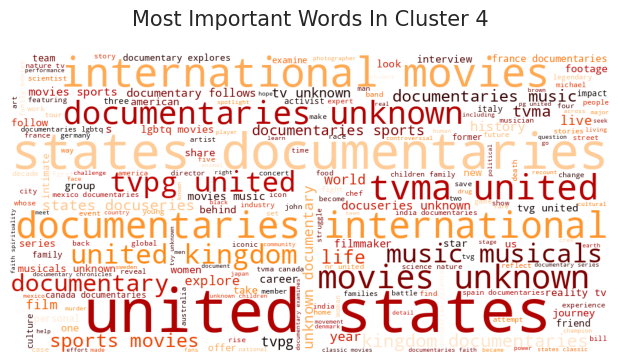

In [109]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

Keywords observed in cluster 4: international movies, drama, comedies, romantic etc.

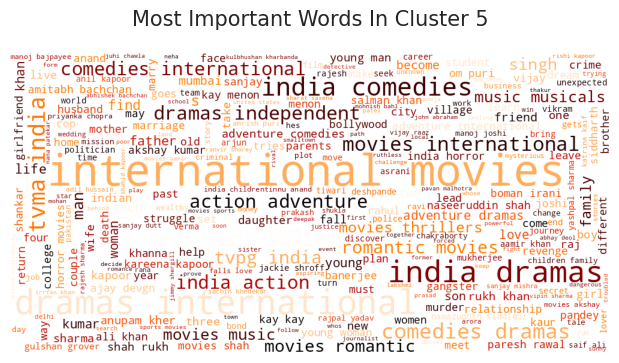

In [110]:
# WordCloud for cluster 5
kmeans_worldcloud(5)

Keywords observed in cluster 5: united states, children, family, dramas, independent movies etc.

4.  Explain the model which you have used and the feature importance using any model explainability tool?

In [111]:
# Here i have use topic modeling instead of feature importance and model explainability.
# Model explainability does majory help in classification problem but here is the project of unsupervised ML.
# In topic modeling, we can get topic wise feature importance.

Here i have use topic modeling. Assume that the clusters are topics. Here for topic modeling i use CountVectorizer process for Vectorization of data and i use Latent Dirichlet Allocation for building a topic.

In [112]:
# Use count vectorization process for our data
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
document_term_matrix=count_vectorizer.fit_transform(data['tags'])

In [113]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

array([[0.98217272, 0.00356331, 0.00356711, 0.00356336, 0.00356704,
        0.00356645],
       [0.62288201, 0.35675766, 0.00510673, 0.00508955, 0.00507551,
        0.00508853],
       [0.00421971, 0.00422651, 0.70988067, 0.00419922, 0.27327422,
        0.00419968],
       ...,
       [0.00731108, 0.00730047, 0.96328253, 0.0073328 , 0.00731645,
        0.00745666],
       [0.24524111, 0.00619604, 0.00620556, 0.00622358, 0.72992541,
        0.0062083 ],
       [0.13359288, 0.0069693 , 0.73600505, 0.00699125, 0.10947753,
        0.00696399]])

In [114]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
tv shows international tvma dramas 

Topic 1: 
movies international india dramas comedies 

Topic 2: 
united states movies tvma dramas 

Topic 3: 
united states movies standup comedy 

Topic 4: 
tv shows unknown united international 

Topic 5: 
tv shows international japan tvma 



In [115]:
# Generate WordCloud Images for Given Topics
# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

  # Create a String to Store All The Words
  imp_words_topic=""

  # Set Parameters
  comp=lda.components_[topic_num]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(imp_words_topic)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Features in Topic {topic_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  #Display Chart
  plt.show()

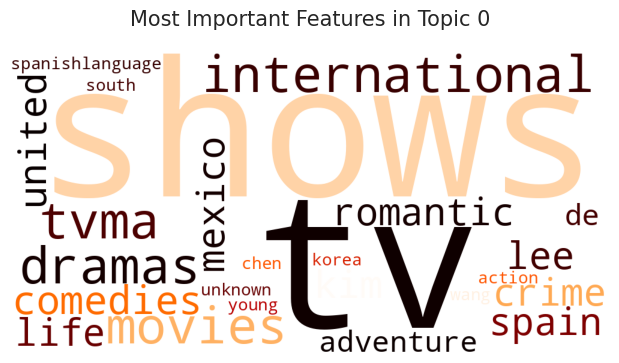

In [116]:
# WordCloud for Topic 0
draw_word_cloud(0)

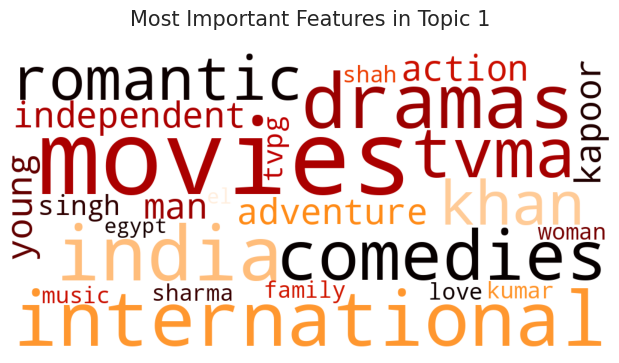

In [117]:
# WordCloud for Topic 1
draw_word_cloud(1)

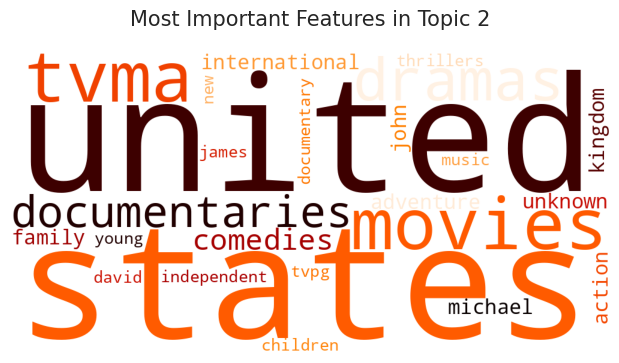

In [118]:
# WordCloud for Topic 2
draw_word_cloud(2)

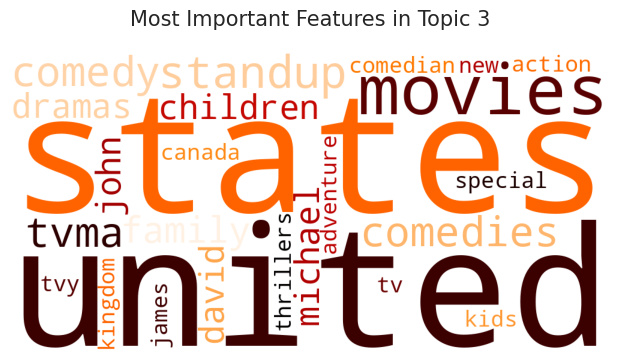

In [119]:
# WordCloud for Topic 3
draw_word_cloud(3)

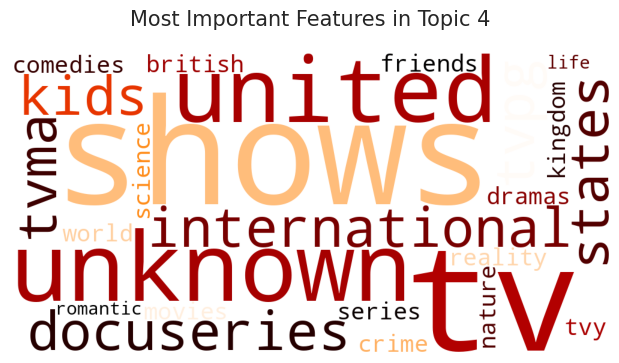

In [120]:
# WordCloud for Topic 4
draw_word_cloud(4)

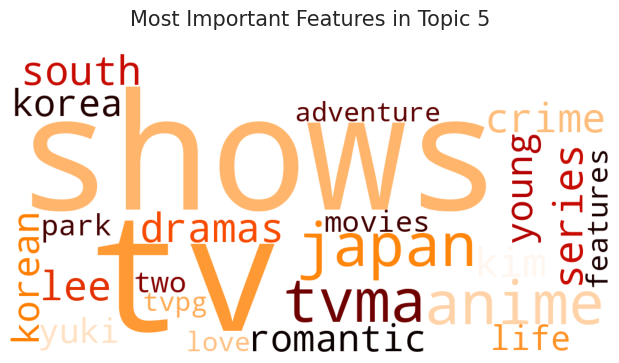

In [121]:
# WordCloud for Topic 5
draw_word_cloud(5)

Here from those wordcloud plots we can know which word is important for which cluster. We can also decide the name of Topics (Clusters) from this plots.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [122]:
# Save the File
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [123]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

array([1, 2, 2, ..., 4, 1, 4], dtype=int32)

In [124]:
y_kmean

array([1, 2, 2, ..., 4, 1, 4], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1.In this project, we worked on a text clustering problem where in we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

2.The dataset contained about 7787 records, and 12 attributes. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

3.It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

4.Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.

5.It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

6.Through TFIDF Vectorization, we created a total of 20000 attributes. We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000. We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

7.Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

8.A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***